## 02.최근접 이웃(KNN : K Nearest Neighborhood)

## (1) KNN 이해하기
옛말에 "유유상종"<span style="font-size:70%">[1]</span>이기 때문에 "그 사람을 알려면 그가 사귀는 친구를 보라"<span style="font-size:70%">[2]</span> 라는 말이 있다. 서로 비슷한 사람들이 끼리끼리 어울려 다니며 사귀는법이기 때문에 어울리는 무리를 통해 그 사람에 대해서 판단해볼만 하다는 이야기이다. 이는 KNN알고리즘의 작동 방식과 정확하게 일치한다. 

KNN은 어떤 미지의 데이터에 대하여 가장 근접한 데이터의 라벨을 그 데이터의 정체로 판단하는 지도학습 분류(Classification) 알고리즘을 말한다. 

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_01.png?raw=true" width=500>
	<p>[그림201]</p>
</div>

## (2) KNN의 작동원리

KNN은 어떤 미지의 라벨을 분류하는 지도학습 방식의 알고리즘이기 때문에, 분류하고자 하는 정답값이 존재하는 라벨링이 된 데이터를 모델학습에 활용한다.

KNN은 학습시 별도의 복잡한 과정 없이 훈련데이터 모두를 N차원상의 벡터공간의 한 점(벡터)으로 메모리에 저장하고 학습을 마무리한다. 아래 그림처럼 총 10개의 관측값이 존재하는 라벨링된 데이터를 학습할 경우 10개의 점을 N차원상의 한 점으로 맵핑할 뿐이다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_02.png?raw=true" width=700>
	<p>[그림202]</p>
</div>

그리고 분류할 데이터도 마찬가지로 훈련데이터와 같은 벡터공간의 벡터로 맵핑하고, 사전에 맵핑시킨 모든 벡터와 거리를 비교한다.

그 후 가장 가까운 K개만큼의 벡터를 추출해 그 중 다수결 원칙에 따라 분류를 진행한다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_03.png?raw=true" width=400>
	<p>[그림203]</p>
</div>

그렇기 때문에 K의 수에 따라 모델이 분류하는 결과값이 달라질 수 있으며, 보통은 K값의 동률을 방지하기 위해 홀수로 설정하며, 만약 동률이 발생할 경우 무작위 혹은 각 점의 거리가 짧은 순으로 판단한다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_04.png?raw=true" width=600>
	<p>[그림204]</p>
</div>

## (3)KNN 알고리즘 더 깊게 이해하기

### KNN 알고리즘의  특징
KNN은 단순히 데이터를 N차원상의 벡터공간의 한 점으로 저장하고, 비교하여 예측값을 제공할 뿐이기 때문에 [01.머신러닝의 이해](https://github.com/int29/PMLP-101/blob/main/chapter_01_Understanding_Machine_Learning/01.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0.md) 에서 머신러닝의 학습에 대해 설명했던 추상화와 일반화 과정이 없는 모형이다. 이렇게 모델을 만들지 않고 단순히 각 데이터를(인스턴스) 저장하였다 활용하는 알고리즘을 인스턴스 베이스 머신러닝 알고리즘이라고 하고, KNN은 인스턴스 베이스 모델중 한가지 이다.<span style="font-size:70%">1</span>,<span style="font-size:70%">2</span> 

KNN은 학습과정에서 추상화를 통해 데이터의 패턴을 계산하고 미지의 데이터에 대해서도 잘 반영할 수 있는 모델을 만드는 일반화 과정 없이 단순히 벡터공간상의 한 점으로 맵핑하여 학습을 진행하기 때문에 모델 베이스 머신러닝에 비해서 훈련속도가 빠르다. 

또한 간단한 알고리즘이기 때문에 하이퍼 파라미터가 적어 개발 및 파라미터 튜닝과정 또한 상대적으로 빨리 모델을 개발할 수 있다. 

마지막으로 로직이 직관적이기 때문에 가장 처음 생성하고 살펴보는 베이스모형(혹은 벤치마크모형)에 많이 사용하곤한다.

반면 분류하려는 값에 대하여 모든 훈련 인스턴스와 비교를 진행하기 때문에 훈련속도는 빠르지만 예측(분류)하는 속도는 모델 베이스 모형보다 느리다. 또 두 벡터 사이의 거리를 계산하는 방식으로 이상치나 잡음, 데이터 피처(Feature)의 스케일에 영향을 많이 받는다는 단점이 존재한다. 또한 적절 K를 선정하는것이 어렵다. 

### KNN의 거리계산 방식
KNN은 거리가 가까울수록 유사도가 높고, 거리가 멀수록 유사도가 낮다는 굉장히 심플한 논리를 갖고 있다. 따라서 KNN은 벡터(좌표평면의 한 점)끼리의 거리를 계산하여 얼마나 유사한지 유사도를 계산한다. 거리 계산 시 가장 많이 사용하는 방법은 유클리디안 거리(Euclidean distance) 계산 방식으로 중학교 수학에 나오는 피타고라스의 정리와 계산방법이 동일한 거리계산 법이다. 

> 유클리디안 거리(Euclidean distance)는 유클리드가 선형대수에서는 L2 norm이라고 부르는 벡터간 최단거리를 계산하는 방법이다. 세분화된 분야에 따라서 부르는 명칭은 다르지만 계산하는 방식은 모두 동일하다.

유클리디안 거리(Euclidean distance) 는 아래와 같이 계산한다.

$$d(p,q) = \sqrt{\sum_{i=1}^n (q_i - p_i)^2} =  \sqrt{(x_1 - x_2)^2+(y_1 - y_2)^2+...+(u_1 - u_2)^2} $$
$d(p,q)$는 두 점 $p$와 $q$ 사이의 거리를 나타내고, $n$은 차원의 수를 나타냄. $u$는 N번째 차원의 축을 의미함

예를 들어 x축과 y축 2개의 축을 갖는 2차원상의 두 점(벡터) $p$와 $q$는 각각 $(x_1, y_1)$, $(x_1, y_2) = (1, 2), (3, 4)$ 이라는 좌표를 갖는다고 해보자.  두 점 $p$와 $q$는 아래와 같이 좌표계에 표현이 가능할 것이다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_05.png?raw=true" width=400>
	<p>[그림205]</p>
</div>

이 때 두 점사이의 최단거리는 두점의 직선거리가 되기 때문에 

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_06.png?raw=true" width=400>
	<p>[그림206]</p>
</div>

유클리디안 거리 계산 공식에 대입하면 두 점사이의 거리가 $2$ 임을 계산할 수 있다.
$$d(p,q) =\sqrt{(1 - 3)^2+(2 - 4)^2}= \sqrt{(-2)^2+(-2)^2} = \sqrt{4} = 2$$

이를 쉽게 생각하면 아래와 같은 삼각형의 대각선의 거리와 동일한 모양이 나온다. 따라서 피타고라스의 정리를 적용하면 동일한 결과가 나오는것을 알 수 있다.

<div align="center">
	<img src="https://github.com/int29/PMLP-101/blob/main/chapter_02_Algorithm_Classification_01_KNN/02_07.png?raw=true" width=400>
	<p>[그림207]</p>
</div>

> 거리를 계산하는 방법이나, 유사도를 계산하는 방법은 맨하튼 거리(L1 norm), 코사인유사도($\theta$)(cosin distance), 두 점사이의 상관관계를 활용하는 마할라노비스 거리(Mahalanobis distance) 등 여러 방법이 존재한다. 각 방법의 장단이 존재하고 사용해야하는 상황이 각기 다르기 때문에 추후에 꼭 각 거리의 계산법과 장단점들을 공부하길 바란다.<span style="font-size:70%">[3]</span> 

## (4) KNN데이터 활용해보기

Iris 데이터는 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' 총 4개의 피처(features)로 구성돼 있다. 이번 챕터는 위에서 설명한 KNN모형에 대해서 활용과 함께 이해하는 것이 목표이기 때문에 우선 'petal length (cm)', 'petal width (cm)' 2개의 피처로 KNN모형을 만들어 실제 KNN알고리즘이 어떻게 작동하는지 확인하고 4개의 모든 피처로 iris의 class를 분류(예측)하는 완성된 KNN모형을 만들것이다.


사용하는 Iris 데이터의 설명과 전처리 및 EDA에 대한내용은 분량 및 구성상 [예제 데이터 설명 : iris 데이터]() 에 설명해 두었으니, 본 예제를 진행하기 전 꼭 확인후에 알고리즘 활용을 살펴보길 바란다. 

### Step00 : 라이브러리 로드
pure python을 통해서 A부터 Z까지 개발하는건 아니기 때문에 데이터를 핸들링하는 pandas, numpy 라이브러리, 시각화를 도와주는 matplotlib, KNN모델을 만들 수 있는 sklearn라이브러리를 로드한다.

사용하는 라이브러리는 아래와 같고 설치가 필요할 경우 아래 명령어를 통해 설치하도록 하자.
1. 데이터 전처리를 위한 pandas 및 numpy 라이브러리
    * `pip install pandas, nump` <br><br>
2. sklearn 머신러닝 라이브러리
    * `pip install scikit-learn`

In [1]:
# 데이터 전처리를 위한 pandas 및 numpy 라이브러리 로드
import pandas as pd
import numpy as np

# sklearn 머신러닝 라이브러리에서 iris 예제 데이터 로드하는 함수 로드
from sklearn.datasets import load_iris

# sklearn KNN 로드
from sklearn import neighbors

# sklearn Train&Test Set나누는 함수 로드
from sklearn.model_selection import train_test_split

# Sklearn 평가(metric)함수 중 accuracy 점수 로드
from sklearn.metrics import accuracy_score

# warnning message를 노출하지 않는 설정
import warnings
warnings.filterwarnings(action='ignore')

### Step01 : 데이터 로드 및 클린징(전처리)

라이브러리를 로드하였다면, Iris데이터를 로드하고 데이터프레임형태로 전처리한다.

In [2]:
# iris 데이터로드 및 처리
iris_data = load_iris()

# iris 피처데이터 값, 피처 칼럼명, 타겟 데이터값, 타겟값의 각 class의 이름 로드
# 해당 과정에 대한 자세한 설명은 [예제 데이터 설명 : iris 데이터]를 참고

features = iris_data['data'] # iris데이터에서 피쳐들의 값을 추출
column_name = iris_data['feature_names'] # iris데이터에서 피쳐칼럼명을 추출

target = iris_data['target'] # iris데이터에서 타겟 칼럼값을 추출
target_name = iris_data['target_names'] #타겟값의 각 class의 이름 로드

# python dictionry 형태의 iris데이터를 pandas데이터프레임으로 변환
iris_df = pd.DataFrame(features, columns= column_name)

# 추출한 타겟값을 target이라는 칼럼명으로 추가
iris_df['target'] = target

# 0,1,2 코드형태로 저장된 타켓값을 알맞게 'setosa', 'versicolor', 'virginica'에 맞는 신규칼럼생성
iris_df['target_names'] = ''
iris_df['target_names'][iris_df['target']==0] = iris_data['target_names'][0]
iris_df['target_names'][iris_df['target']==1] = iris_data['target_names'][1]
iris_df['target_names'][iris_df['target']==2] = iris_data['target_names'][2]

In [3]:
# 데이터 head 체크
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [4]:
# 데이터 head 체크
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


### Step02 : 모델 훈련을 위한 데이터 준비

In [23]:
# 데이터를 피쳐 + 타겟으로 분리
# 이번 예제에서 피처는 'petal length (cm)', 'petal width (cm)' 2개를 사용할 예정이다.

# 'petal length (cm)', 'petal width (cm)'만 선택하여 훈련데이터 생성
X = iris_df[['sepal length (cm)', 'sepal width (cm)']]

# 타겟
y = iris_df['target']

# 모델을 학습할 데이터인 150송이 중 80%와 테스트할 20%를 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)

### Step03 : 모델훈련

In [24]:
# estimater 생성 (모델 생성, k=1)
clf = neighbors.KNeighborsClassifier(n_neighbors=1)

# 모델 훈련(train data)(보통 feeding 이라고 부름: 데이터를 먹인다)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Step04 : 예측 및 평가

In [25]:
# 타켓값이 없는 X_test를 통해 테스트셋에 대한 예측
pred = clf.predict(X_test)

# 예측값 확인
pred

array([2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 2, 0])

In [27]:
# 실제 값과 평가
accuracy_score(pred, y_test)*100

80.0

## (5) KNN 알고리즘 실제 작동 상세하게 살펴보기

상단의 KNN알고리즘 설명이 실제로 어떻게 작동하는지 살펴보는 부분이다. 실제 train한 데이터를 2차원 평면상에 산점도(scatter plot)로 표현하고 거리를 통해 실제 작동하는 방식에 대해 살펴보자. 

파이썬에는 데이터를 시각화하는 시각화라이브러리인 matplotlib가 있지만, matplotlib만으로 시작화를 진행하려면 상당히 코드가 길어지고 matplotlib에 대한 높은 이해도도 필요하다. 그렇기 때문에 matplotlib가 기반으로 이 작업을 쉽게 진행해줄 mlxtend 라이브러리의 plot_decision_regions( ) 라는 함수를 사용한다. plot_decision_regions는 하나의 함수로 복잡한 과정을 쉽게 만들어 준다.

### 시각화를 위한 라이브러리 로드
마찬가지로 설치가 필요할 경우 아래와 같은 pip 명령어로 설치를 진행하자

1. 파이썬 데이터 시각화 라이브러리 matplotlib
    * `pip install matplotlib` <br><br>
2. matplotlib기반 머신러닝 시각화 라이브러리 mlxten
    * `pip install mlxten`

In [28]:
# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# 머신러닝 모형을 시각화하는것을 도와주는 라이브러리 mlxtend
from mlxtend.plotting import plot_decision_regions

# 주피터 노트북에 차트를 바로 랜더링하기 위한 주피터노트북 내장 매직명령어
%matplotlib inline 

아래 plot_decision_regions의 사용을 먼저 살펴보자

KNN의 기본 시각화를 위해서 plot_decision_regions에는 x축, y축, 사용한 모델 estimator가 필수로 필요하다.
형태로 `plot_decision_regions(x축에 들어갈 데이터, y축에 들어갈 데이터, 사용한 모델 estimator)` 사용한다.

단, 우리는 사용하는 데이터를 pandas.DataFrame형태로 처리하고 학습하였지만, plot_decision_regions는 함수의 인자(arguments)를 numpy.array로 필요로 하기 때문에 pandas.DataFrame의 값만 numpy.array로 변경해주는 `.values`를 활용해서 numpy.array형태로 plot_decision_regions 함수에 사용해야 한다. 

`plot_decision_regions(X_train.values, y_train.values, clf=clf, X_highlight=X_test.values)`


In [29]:
#X_train 의 타입, #X_train.values 의 타입
print( type(X_train), type(X_train.values) )

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


plot_decision_regions가 편리한점은 모델 훈련데이터에 테스트데이터를 간단하게 맵핑가능하다는 것이다. plot_decision_regions의 `X_highlight` 인자에 똑같이 예측에 활용할 테스트데이터를 numpy.array형태로 넣어준다면 간단하게 테스트데이터도 모델훈련정보에 같이 표현할 수 있다.
단, 테스트데이터에 대한 차트맵핑은 투명한 검정색 `o` 형태의 점으로 차트내에 표시된다.

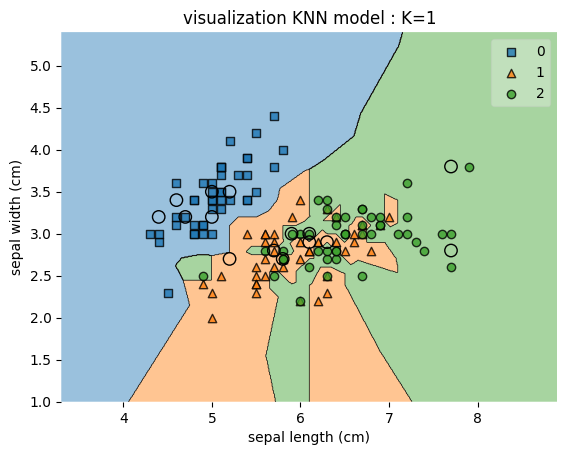

In [30]:
# 단, mlextend 라이브러리의 경우 모든 arg를  np.array로 필요로 하기 때문에 데이터프레임형태의 X_train를 np.array값으로 받아온다.
n_neighbors=1
plot_decision_regions(X_train.values, y_train.values, clf=clf, X_highlight=X_test.values)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()

우리가 만든 k=1인 KNN모델을 시각화해보면 위와 같다. 그림에서 영역간의 경계가 칠해져 있는데 이것을 판별경계라 부른다. 단어에서 직감할 수 있듯이 이 경계를 통해 타겟값을 판별할 수 있다. 우리가 만든 KNN 모형은 아주 미세한 거리차이가 발생하더라도 가까운 k=1개를 추출하여 분류하기 때문에 거리 계산상 판별경계안에 있다면 무조건 경계에 해당하는 레이블로 타겟값이 분류된다.

실제 테스트데이터를 살펴보면 직관적으로 가장 가까운 1개의 점으로 데이터가 분류될것임을 예상해볼 수 있고, 실제 훈련한 KNN모형에 테스트데이터을 시각화 하여 판별경계를 통해서 데이터가 잘 예측된것을 확인할 수 있다.

이 때 이 경계는 이미 훈련된 모형을 통해 만들어졌기 때문에 테스트데이터를 통해 새로이 계산한 값은 아님을 참고바란다.

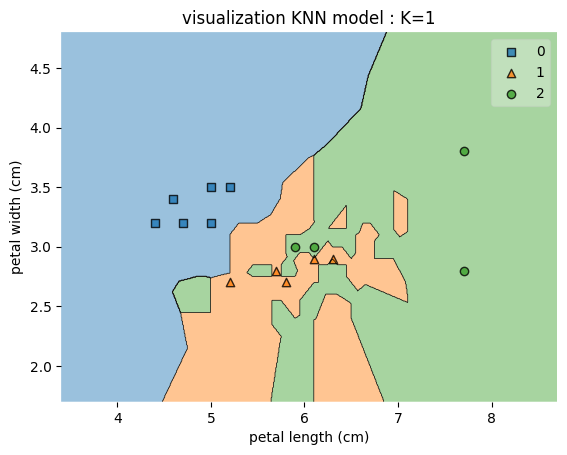

In [31]:
# 테스트데이터 시각화
# X_test데이터와 모델이 예측한 값인 pred를 사용한다.
plot_decision_regions(X_test.values, pred, clf=clf)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()

### KNN 하이퍼파라미터

머신러닝에는 사용자가 정해줘야하는 값인 하이퍼 파라미터라는 값이 존재한다. 이 하이퍼 파라미터를 어떻게 결정하느냐에 따라 좋은결과를 얻을 수도, 과적합이나 과소적합된 모형을 만들 수 있기 때문에 모델의 훈련정확도를 올리고 테스트데이터에 대한 일반화 정도를 높이기 위해 하이퍼 파라미터 튜닝하는 과정이 필수적으로 요구된다. 

단, iris데이터의 경우 별도의 튜닝과정 없이 정확도가 100%가 되었기 때문에 추가적으로 정확도를 올리는 하이퍼파라미터 튜닝과정을 직접 진행하지는 않을 것이다. 그렇지만 대부분은 하이퍼 파라미터 튜닝이 필요하고 매우 중요한 과정으로 여겨지기 때문에 하이퍼 파라미터를 조정함으로 인해 모델이 어떻게 변화하는지 확인여 튜닝의 컨셉과 원리에 대해서 이해하길 바란다.

sklearn 라이브러리의 neighbors.KNeighborsClassifier( ) 는 아래와 같이 사용자가 정해주어야할 하이퍼파라미터가 존재한다.

    KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

지금부터 neighbors.KNeighborsClassifier의 주요한 하이퍼파라미터가 의미하는 바와 어떻게 영향을 미치는지 확인해보자.

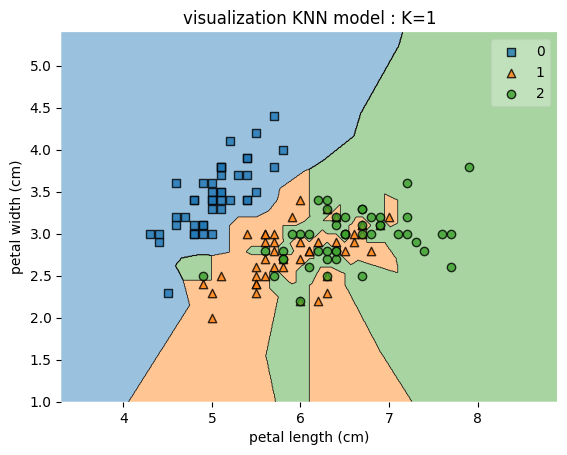

In [32]:
n_neighbors = 1 # K=1일경우 시각화
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

# 모델 훈련(train data)
clf.fit(X_train, y_train)

# 테스트데이터 시각화
# X_test데이터와 모델이 예측한 값인 pred를 사용한다.
plot_decision_regions(X_train.values, y_train.values, clf=clf)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()

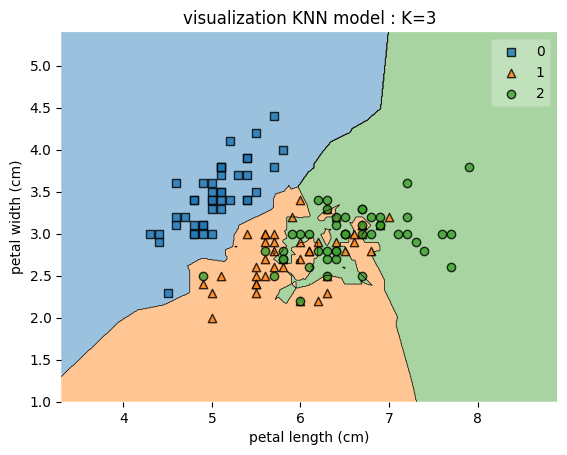

In [33]:
n_neighbors = 3 # K=3일경우 시각화
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

# 모델 훈련(train data)
clf.fit(X_train, y_train)

# 테스트데이터 시각화
# X_test데이터와 모델이 예측한 값인 pred를 사용한다.
plot_decision_regions(X_train.values, y_train.values, clf=clf)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()

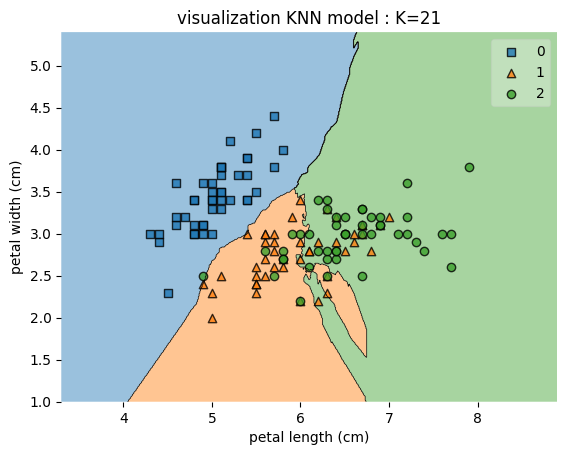

In [34]:
n_neighbors = 21 # K=21일경우 시각화
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

# 모델 훈련(train data)
clf.fit(X_train, y_train)

# 테스트데이터 시각화
# X_test데이터와 모델이 예측한 값인 pred를 사용한다.
plot_decision_regions(X_train.values, y_train.values, clf=clf)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()

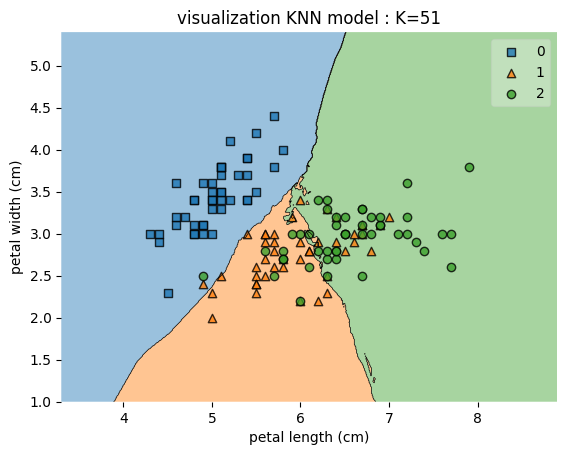

In [35]:
n_neighbors = 51 # K=21일경우 시각화
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

# 모델 훈련(train data)
clf.fit(X_train, y_train)

# 테스트데이터 시각화
# X_test데이터와 모델이 예측한 값인 pred를 사용한다.
plot_decision_regions(X_train.values, y_train.values, clf=clf)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()

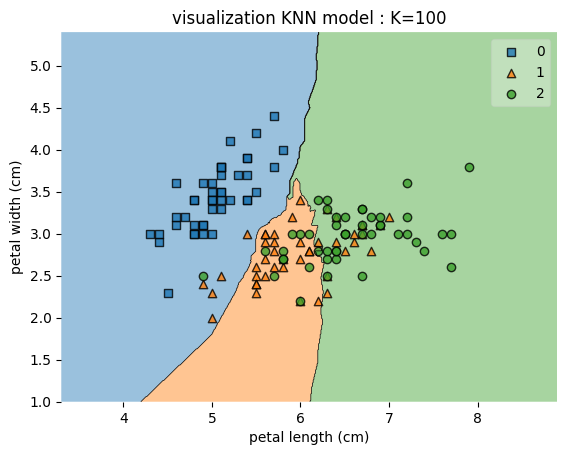

In [36]:
n_neighbors = 100 # K=21일경우 시각화
clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)

# 모델 훈련(train data)
clf.fit(X_train, y_train)

# 테스트데이터 시각화
# X_test데이터와 모델이 예측한 값인 pred를 사용한다.
plot_decision_regions(X_train.values, y_train.values, clf=clf)

# matplotlib 에서 x축이름(xlabel), y축이름(ylabel), 차트제목(title)을 지정해주는 옵션으로 
# matplotlib사용법이기 때문에 참고만 진행해도 좋다.
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title(f'visualization KNN model : K={n_neighbors}')
plt.show()


### 인용

<span style="font-size:70%">[1]</span> : 네이버 국어사전(https://ko.dict.naver.com/#/entry/koko/dcc68b744c1b410dae38939990808f7c) 

<span style="font-size:70%">[2]</span> :  不知其人이어든 視其友하라 (http://www.hanjanews.com/news/articleView.html?idxno=3650)
> 不知其子이어든 視其父하고 不知其人이어든 視其友하라.
> [독음]부지기자 시기부 부지기인 시기우[해석] 그 아들을 모르겠거든 그 아비를 보고 그 사람을 모르겠거든 그 친구를 보라

<span style="font-size:70%">[3]</span> : 데이터 과학을 위한 통계 : 데이터 분석에서 머신러닝까지 50가지 핵심개념(2018), 피터 브루스, 앤드루 브루스, 이준용, 김태헌, 한및미디어, 242p 
><원문>
>벡터사이의 거리를 측정하기 위해 수많은 거리 지표들이 있다. 수치 데이터를 다룰 때, 마할라비스 거리 Mahalanobis distance는 두 변수 간의 상관관계를 사용하기 때문에 .... <후략>

### 미주
<span style="font-size:70%">1</span> : 반대로 추상화와 일반화 과정을 거쳐 특정 모형을 생성하여 학습후 해당 모형을 통해 예측하는 모형을 모델 베이스 머신러닝(model based machine learning)이라 부른다. 이러한 모델 베이스 머신러닝은 특정 구조의 모형을 가정하고, 그 성질을 파라미터로 표현하는 존재하는 parametric 모형과 특정 구조의 모형을 가정하지 않는  모형인 non-parametric모형 중 어떤 모형을 활용하는지에 따라  parametric machine learning 과 non-parametric machine learning 으로 분류한다. 

<span style="font-size:70%">2</span> : 또는 게으른 학습(Lazy learning) 알고리즘이라고도 부른다.
